Student Name: Zhibing Liu\
Student Number: 1010506515

## **1. Load the Library that may used in this code**

In [155]:
# Import all the library that we may used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install dfply
from dfply import *
%pip install pingouin
from pingouin import ancova


## **2. Clean the dataset for further use**

In [156]:
# Load the dataset
# Read the input dataset file
data = pd.read_csv('../INF2178_A3_data.csv')
data.head()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2


In [157]:
# Define essential columns
essential_columns = [
    'fallreadingscore',
    'fallmathscore',
    'fallgeneralknowledgescore',
    'springreadingscore',
    'springmathscore',
    'springgeneralknowledgescore',
    'incomegroup'
]

# Remove non-essential columns and explicitly create a copy of the slice for manipulation
data_reduced = data[essential_columns].copy()

# Now, add columns for the score changes directly to data_reduced
data_reduced['reading_score_change'] = data_reduced['springreadingscore'] - data_reduced['fallreadingscore']
data_reduced['math_score_change'] = data_reduced['springmathscore'] - data_reduced['fallmathscore']
data_reduced['general_knowledge_score_change'] = data_reduced['springgeneralknowledgescore'] - data_reduced['fallgeneralknowledgescore']

# Display the first few rows of the reduced dataframe to ensure the new columns are added correctly
data_reduced.head()




,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,incomegroup,reading_score_change,math_score_change,general_knowledge_score_change
0,36.58,39.54,33.822,49.37,50.10,40.533,3,12.79,10.56,6.711
1,50.82,44.44,38.147,83.50,58.93,37.409,3,32.68,14.49,-0.738
2,40.68,28.57,28.108,40.41,32.81,29.312,3,-0.27,4.24,1.204
3,32.57,23.57,15.404,34.14,35.25,27.382,2,1.57,11.68,11.978
4,31.98,19.65,18.727,32.84,23.60,26.977,2,0.86,3.95,8.250


## **3. Exploratory Data Analysis (EDA) & Interaction Plots**

In [158]:
# The describe() method by default includes these statistics: count, mean, std, min, 25%, 50%, 75%, max.
summary_statistics = data_reduced.describe()

# The describe() method by default includes these statistics: count, mean, std, min, 25%, 50%, 75%, max.

print(summary_statistics)

       fallreadingscore  fallmathscore  fallgeneralknowledgescore  \
count      11933.000000   11933.000000               11933.000000   
mean          35.954215      27.128244                  23.073694   
std           10.473130       9.120505                   7.396978   
min           21.010000      10.510000                   6.985000   
25%           29.340000      20.680000                  17.385000   
50%           34.060000      25.680000                  22.954000   
75%           39.890000      31.590000                  28.305000   
max          138.510000     115.650000                  47.691000   

       springreadingscore  springmathscore  springgeneralknowledgescore  \
count        11933.000000     11933.000000                 11933.000000   
mean            47.511178        37.799461                    28.235584   
std             14.327111        12.027753                     7.577457   
min             22.350000        11.900000                     7.858000   
25%

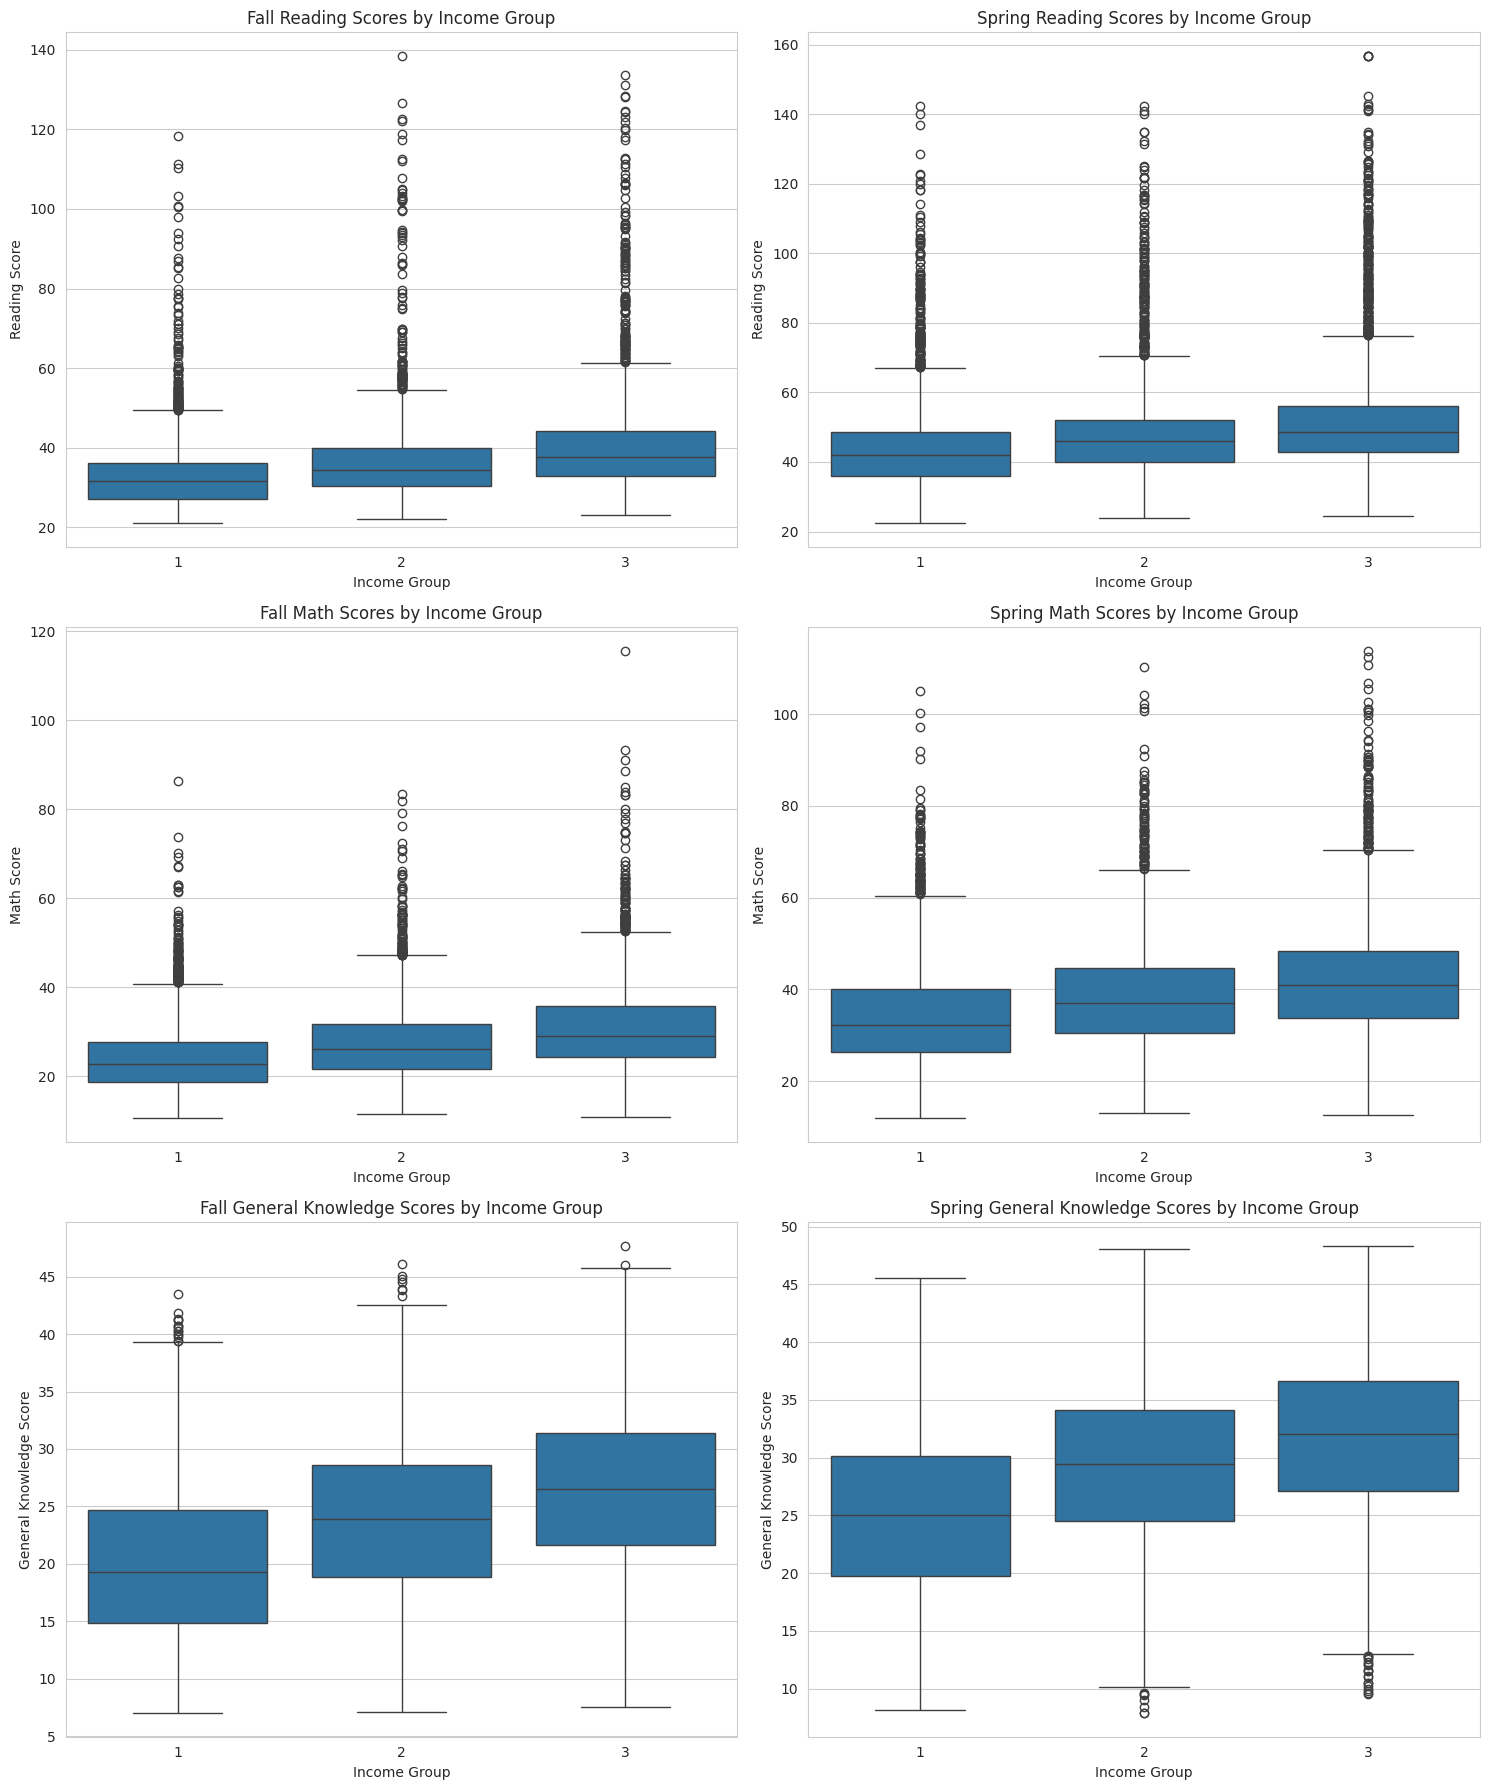

In [159]:
# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 18))  # 3 rows for subjects, 2 columns for fall and spring

# Plot fall reading scores
sns.boxplot(ax=axes[0, 0], x='incomegroup', y='fallreadingscore', data=data_reduced)
axes[0, 0].set_title('Fall Reading Scores by Income Group')
axes[0, 0].set_xlabel('Income Group')
axes[0, 0].set_ylabel('Reading Score')

# Plot spring reading scores
sns.boxplot(ax=axes[0, 1], x='incomegroup', y='springreadingscore', data=data_reduced)
axes[0, 1].set_title('Spring Reading Scores by Income Group')
axes[0, 1].set_xlabel('Income Group')
axes[0, 1].set_ylabel('Reading Score')

# Plot fall math scores
sns.boxplot(ax=axes[1, 0], x='incomegroup', y='fallmathscore', data=data_reduced)
axes[1, 0].set_title('Fall Math Scores by Income Group')
axes[1, 0].set_xlabel('Income Group')
axes[1, 0].set_ylabel('Math Score')

# Plot spring math scores
sns.boxplot(ax=axes[1, 1], x='incomegroup', y='springmathscore', data=data_reduced)
axes[1, 1].set_title('Spring Math Scores by Income Group')
axes[1, 1].set_xlabel('Income Group')
axes[1, 1].set_ylabel('Math Score')

# Plot fall general knowledge scores
sns.boxplot(ax=axes[2, 0], x='incomegroup', y='fallgeneralknowledgescore', data=data_reduced)
axes[2, 0].set_title('Fall General Knowledge Scores by Income Group')
axes[2, 0].set_xlabel('Income Group')
axes[2, 0].set_ylabel('General Knowledge Score')

# Plot spring general knowledge scores
sns.boxplot(ax=axes[2, 1], x='incomegroup', y='springgeneralknowledgescore', data=data_reduced)
axes[2, 1].set_title('Spring General Knowledge Scores by Income Group')
axes[2, 1].set_xlabel('Income Group')
axes[2, 1].set_ylabel('General Knowledge Score')

# Adjust the layout so there is no overlap
plt.tight_layout()
plt.show()


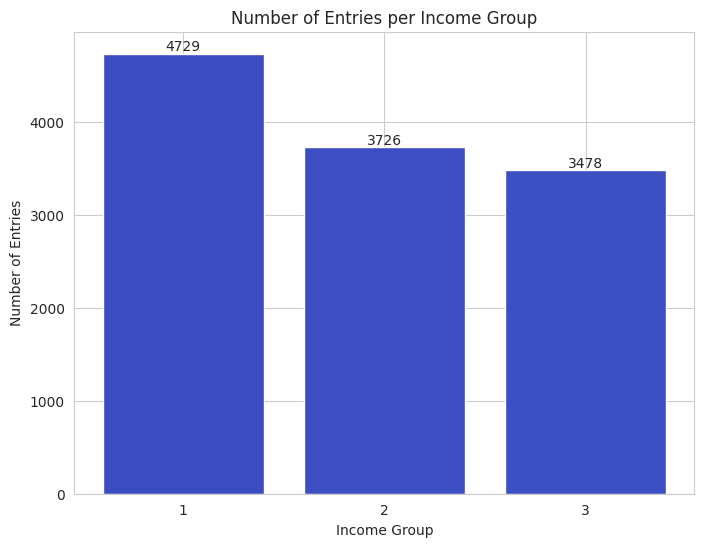

In [160]:
# Count the number of entries for each income group and sort by income group for consistent ordering
income_group_counts = data['incomegroup'].value_counts().sort_index()

# Generating colors from a colormap
colors = plt.cm.coolwarm(range(len(income_group_counts)))

# Creating the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(income_group_counts.index, income_group_counts.values, color=colors)
plt.title('Number of Entries per Income Group')
plt.xlabel('Income Group')
plt.ylabel('Number of Entries')
plt.xticks(income_group_counts.index)  # Ensure x-ticks match the income groups

# Adding the count above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

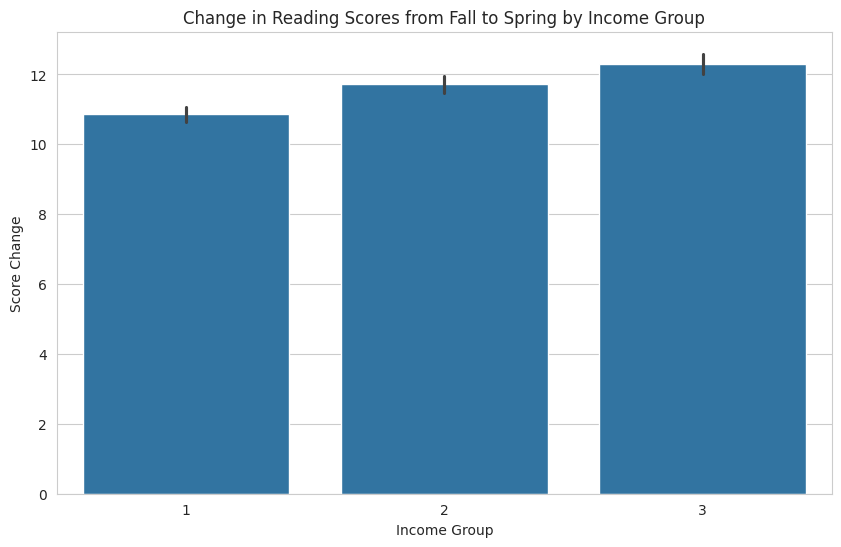

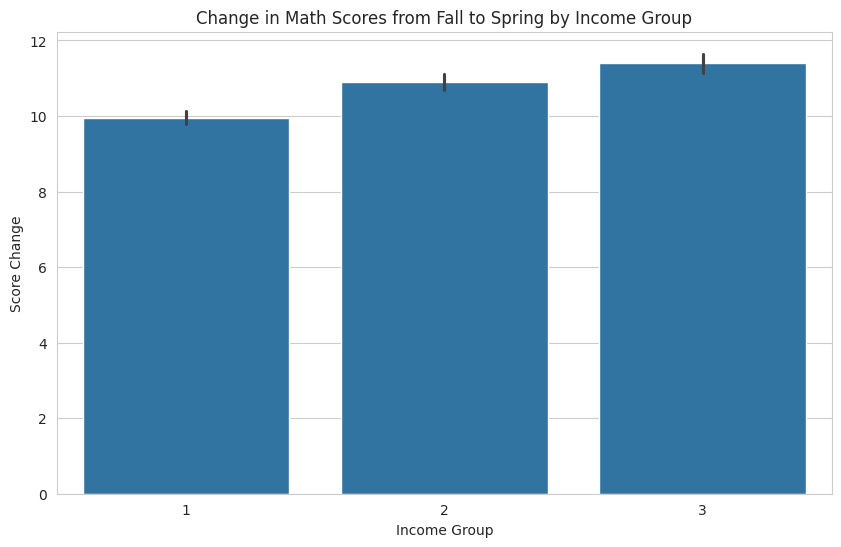

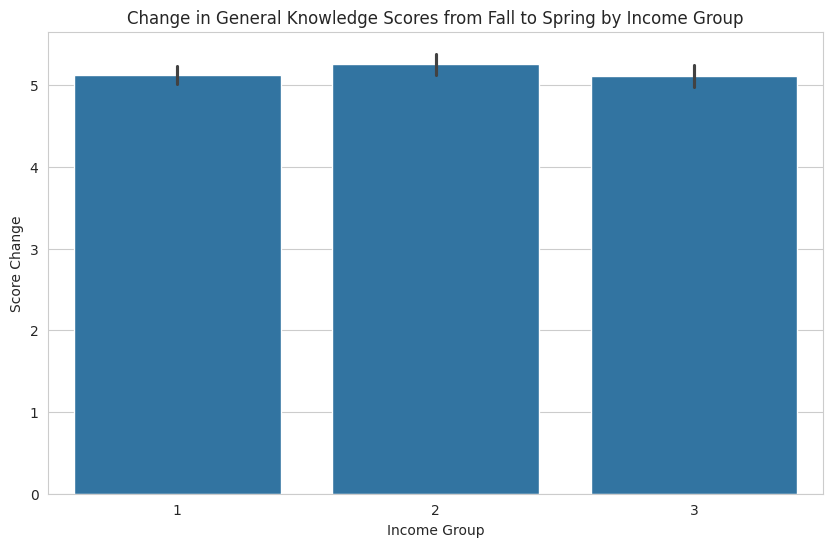

In [161]:
# Visualize the change in reading scores from fall to spring by income group
plt.figure(figsize=(10, 6))
sns.barplot(x='incomegroup', y='reading_score_change', data=data_reduced)
plt.title('Change in Reading Scores from Fall to Spring by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Score Change')
plt.show()

# Repeat for math score change
plt.figure(figsize=(10, 6))
sns.barplot(x='incomegroup', y='math_score_change', data=data_reduced)
plt.title('Change in Math Scores from Fall to Spring by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Score Change')
plt.show()

# And for general knowledge score change
plt.figure(figsize=(10, 6))
sns.barplot(x='incomegroup', y='general_knowledge_score_change', data=data_reduced)
plt.title('Change in General Knowledge Scores from Fall to Spring by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Score Change')
plt.show()


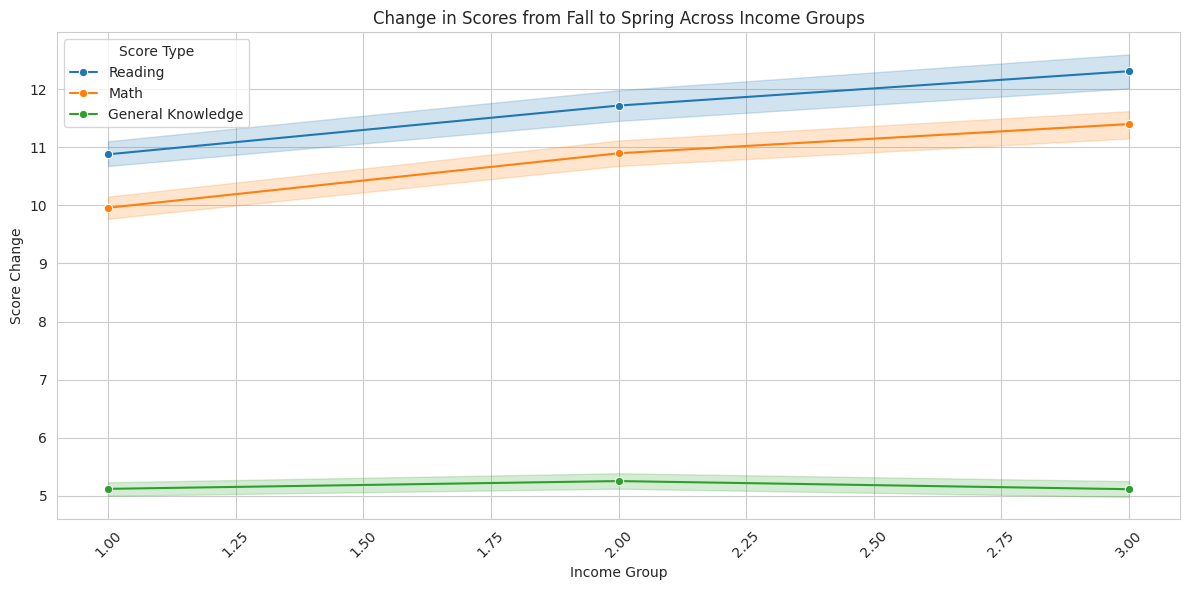

In [162]:
# This involves melting the data_reduced DataFrame to have a long-form DataFrame suitable for sns.lineplot
data_for_plotting = data_reduced.melt(id_vars='incomegroup',
                                      value_vars=['reading_score_change', 'math_score_change', 'general_knowledge_score_change'],
                                      var_name='score_type', value_name='score_change')

# Replace the score_type with more readable labels
data_for_plotting['score_type'] = data_for_plotting['score_type'].replace({'reading_score_change': 'Reading',
                                                                           'math_score_change': 'Math',
                                                                           'general_knowledge_score_change': 'General Knowledge'})

# Plotting score change across different income groups with line graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_for_plotting, x='incomegroup', y='score_change', hue='score_type', marker='o')
plt.title('Change in Scores from Fall to Spring Across Income Groups')
plt.xlabel('Income Group')
plt.ylabel('Score Change')
plt.xticks(rotation=45)  # Rotate labels to make them readable if they overlap
plt.legend(title='Score Type')
plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


## **4. One Way Ancova: reading scores vary across different income groups**

ANCOVA Results:
             Source             SS     DF           F         p-unc      np2
0       incomegroup     513.120105      2    4.055660  1.734793e-02  0.00068
1  fallreadingscore   21099.608888      1  333.539242  1.629240e-73  0.02720
2          Residual  754625.552188  11929         NaN           NaN      NaN


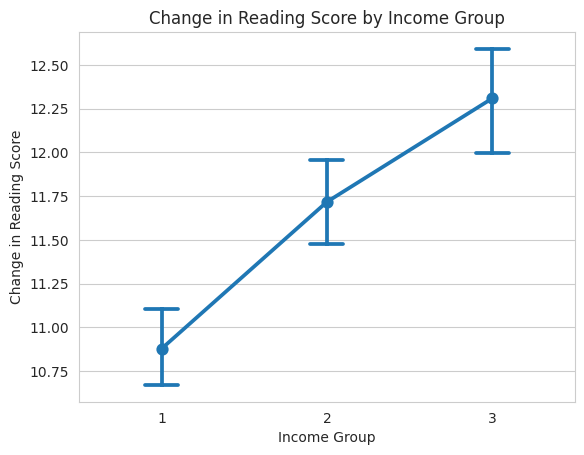

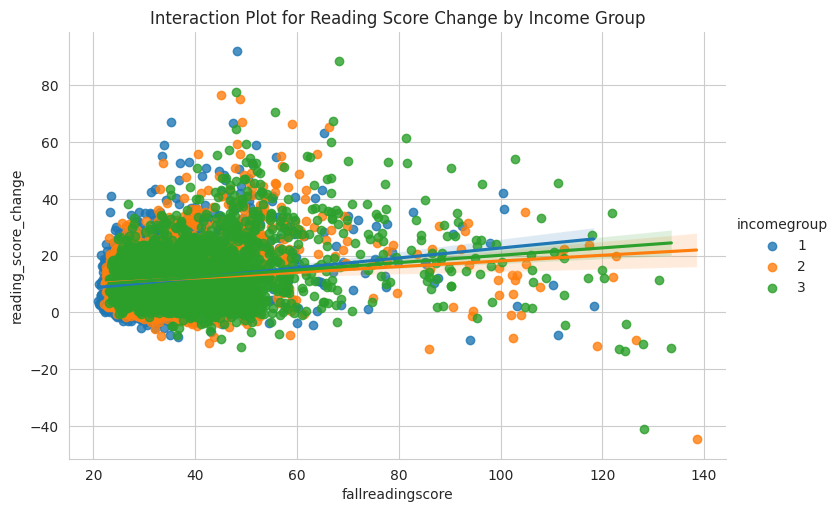

Levene's test p-value for Homogeneity of Variances: 1.0904328845666816e-11
Shapiro-Wilk test p-value for Normality of Residuals: 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [163]:
import pingouin as pg
# Assuming 'data_reduced' is your prepared DataFrame

# Step 0: Data Quality Check
# Check for and handle any missing values
data_reduced = data_reduced.dropna(subset=['reading_score_change', 'fallreadingscore', 'incomegroup'])

# Step 1: One-way ANCOVA
ancova_results = pg.ancova(data=data_reduced, dv='reading_score_change', covar='fallreadingscore', between='incomegroup')
print("ANCOVA Results:")
print(ancova_results)

# Step 2: Interaction Plot
sns.pointplot(data=data_reduced, x='incomegroup', y='reading_score_change', capsize=.2)
plt.title('Change in Reading Score by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Change in Reading Score')
plt.show()

# Model fitting for ANCOVA
model = ols('reading_score_change ~ C(incomegroup) + fallreadingscore', data=data_reduced).fit()

# Interaction plot for reading score change
sns.lmplot(x='fallreadingscore', y='reading_score_change', hue='incomegroup', data=data_reduced, aspect=1.5)
plt.title('Interaction Plot for Reading Score Change by Income Group')
plt.show()

# Test for Homogeneity of Variances using Levene's test
_, p_levene = stats.levene(
    data_reduced['reading_score_change'][data_reduced['incomegroup'] == 1],
    data_reduced['reading_score_change'][data_reduced['incomegroup'] == 2],
    data_reduced['reading_score_change'][data_reduced['incomegroup'] == 3],
    center='mean'
)

# Test for Normality of Residuals using Shapiro-Wilk test
_, p_normality = stats.shapiro(model.resid)

print(f"Levene's test p-value for Homogeneity of Variances: {p_levene}")
print(f"Shapiro-Wilk test p-value for Normality of Residuals: {p_normality}")

## **5. One Way Ancova: math scores vary across different income groups**

ANCOVA Results for Math Score Change:
          Source             SS     DF           F         p-unc       np2
0    incomegroup    1712.758286      2   18.523585  9.284861e-09  0.003096
1  fallmathscore    4806.990621      1  103.975792  2.576573e-24  0.008641
2       Residual  551499.442116  11929         NaN           NaN       NaN


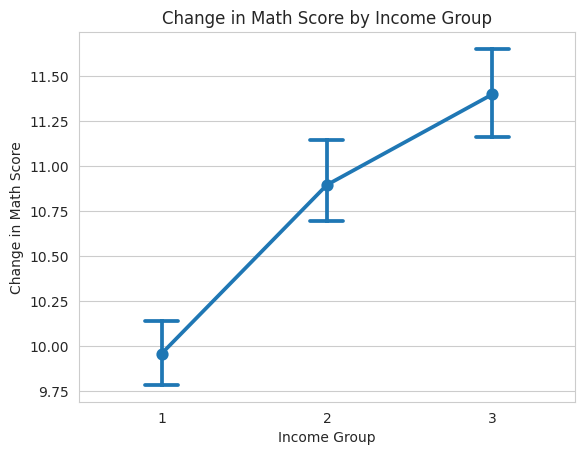

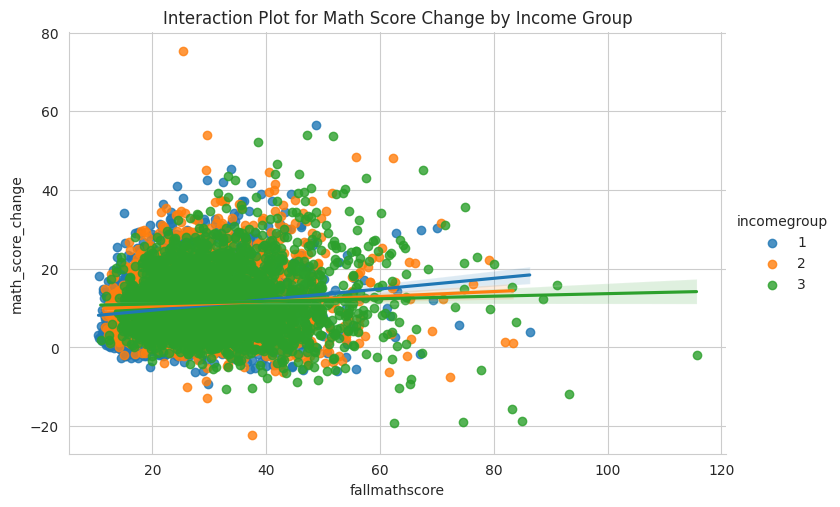

Levene's test p-value for Homogeneity of Variances (Math): 1.6631038771886818e-10
Shapiro-Wilk test p-value for Normality of Residuals (Math): 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [164]:
import pingouin as pg
# Step 0: Data Quality Check
# Check for and handle any missing values
data_reduced = data_reduced.dropna(subset=['math_score_change', 'fallmathscore', 'incomegroup'])

# Step 1: One-way ANCOVA
ancova_results_math = pg.ancova(data=data_reduced, dv='math_score_change', covar='fallmathscore', between='incomegroup')
print("ANCOVA Results for Math Score Change:")
print(ancova_results_math)

# Step 2: Interaction Plot for Math Score Change
sns.pointplot(data=data_reduced, x='incomegroup', y='math_score_change', capsize=.2)
plt.title('Change in Math Score by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Change in Math Score')
plt.show()

# Model fitting for ANCOVA
model_math = ols('math_score_change ~ C(incomegroup) + fallmathscore', data=data_reduced).fit()

# Interaction plot for math score change
sns.lmplot(x='fallmathscore', y='math_score_change', hue='incomegroup', data=data_reduced, aspect=1.5)
plt.title('Interaction Plot for Math Score Change by Income Group')
plt.show()

# Test for Homogeneity of Variances using Levene's test
_, p_levene_math = stats.levene(
    data_reduced['math_score_change'][data_reduced['incomegroup'] == 1],
    data_reduced['math_score_change'][data_reduced['incomegroup'] == 2],
    data_reduced['math_score_change'][data_reduced['incomegroup'] == 3],
    center='mean'
)

# Test for Normality of Residuals using Shapiro-Wilk test
_, p_normality_math = stats.shapiro(model_math.resid)

print(f"Levene's test p-value for Homogeneity of Variances (Math): {p_levene_math}")
print(f"Shapiro-Wilk test p-value for Normality of Residuals (Math): {p_normality_math}")